In [114]:
import numpy as np
import matplotlib.pyplot as plt
import math

import necessery library

In [115]:
def coordinate_convert(angle, input_data):
    count = 0

    angle = (angle/360) * 2*math.pi

    for i in range(len(input_data)):

        count += 1

        new_x = math.cos(angle)*input_data[i][0] - math.sin(angle)*input_data[i][1]
        new_y = math.sin(angle)*input_data[i][0] + math.cos(angle)*input_data[i][1]

        new_point = [new_x, new_y]

        # print(input_data[i])
        # print(new_point)

        if(count == 1):
            output_data = np.array(new_point)
        else:
            temp = np.array(new_point)
            output_data = np.vstack((output_data,temp))

    return output_data

In [116]:
input_file = open('data1.txt', 'r')

raw_data = input_file.readlines()

input_file.close()

for i in range(len(raw_data)):
    raw_data[i] = raw_data[i].lstrip(' [')
    raw_data[i] = raw_data[i].rstrip(']\n')
    raw_data[i] = raw_data[i].strip()

    if(raw_data[i] == ''):
        del raw_data[i]
    
# print(raw_data)

read data from file

In [117]:
count = 0

for data in raw_data:
    count += 1

    temp = data.split()

    for i in range(len(temp)):
        temp[i] = float(temp[i])

    if(count == 1):
        input_data = np.array(temp)
    else:
        arr_temp = np.array(temp)
        input_data = np.vstack((input_data, arr_temp))

# print(input_data)

sort raw_data and transfer to np array

In [118]:
rotation_angle = float(input("enter the rotation angle in degree : "))

output_data = coordinate_convert(rotation_angle, input_data)

# print(output_data)

convert coordinate

In [119]:
output_file = open('frame0.csv', 'w')

for data in output_data:
    for i in range(len(data)):
        output_file.write(f"{data[i]:.3f},")
    
    output_file.write("\n")

output_file.close()

output data to csv file

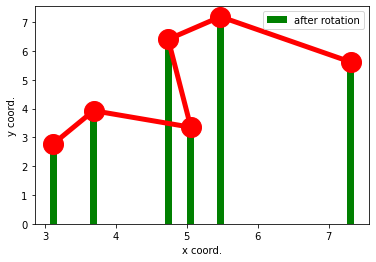

In [124]:
x_list = []
y_list = []

for data in output_data:
    x_list.append(data[0])
    y_list.append(data[1])

x_arr = np.array(x_list)
y_arr = np.array(y_list)

plt.plot(x_arr, y_arr, 'ro-', linewidth = 5, markersize=20)
plt.bar(x_arr, y_arr, width = 0.1, color='green', label = 'after rotation')
plt.legend()
plt.xlabel('x coord.')
plt.ylabel('y coord.')

plt.show()